high: 28766.0 low: 2319.0
[[0.6221878  0.8954891  0.8921239  ... 0.508224   0.29655537 0.31519642]
 [0.7402352  0.6916096  0.7594056  ... 0.44349074 0.48962075 0.30729383]
 [0.7442054  1.         0.690135   ... 0.3677922  0.23647295 0.26180664]
 ...
 [0.53635573 0.82686126 0.9078534  ... 0.12152607 0.20588346 0.14277612]
 [1.         1.         0.9230537  ... 0.29190457 0.13400386 0.1710591 ]
 [0.9202934  0.79941016 0.69062656 ... 0.28483382 0.36215827 0.2726207 ]]
torch.Size([1006, 1006])
<built-in method size of Tensor object at 0x0000028560C11B30>
tensor([[0.7614, 0.7256, 0.7132,  ..., 0.3079, 0.3297, 0.3337],
        [0.7282, 0.6688, 0.7214,  ..., 0.3384, 0.3206, 0.3201],
        [0.6820, 0.6705, 0.7670,  ..., 0.3370, 0.3045, 0.3347],
        ...,
        [0.8908, 0.8542, 0.9130,  ..., 0.1930, 0.2369, 0.2343],
        [0.8775, 0.9103, 0.8876,  ..., 0.2149, 0.2145, 0.2259],
        [0.8644, 0.8442, 0.9081,  ..., 0.2504, 0.1985, 0.2148]])


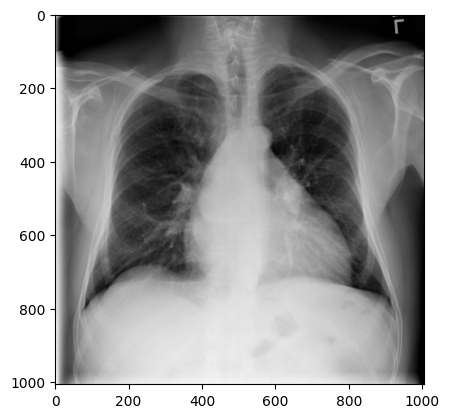

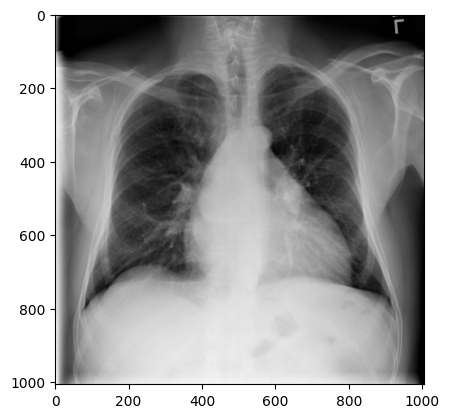

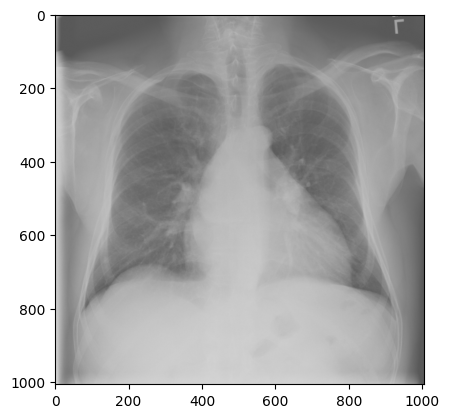

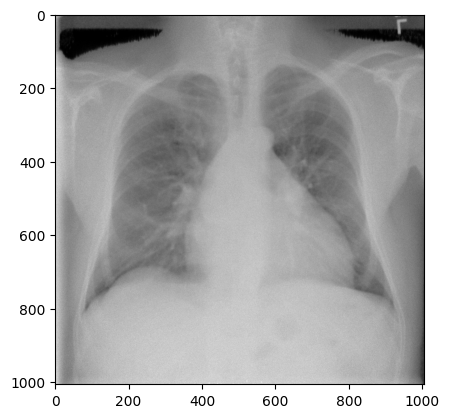

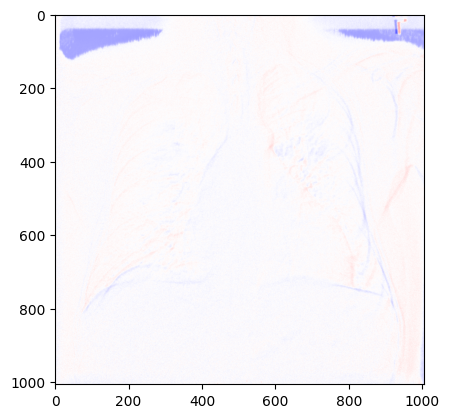

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torch
from torchvision.transforms import GaussianBlur
img = Image.open('nih_CameraSim_processed_correct.tif')
img = np.array(img, dtype=np.float32)
high = np.percentile(img, 99)
low = np.percentile(img, 1)
img = img.clip(low, high)
print(f"high: {high} low: {low}")
img = (img - low) / (high - low)

print(img)
plt.imshow(img, cmap="gray")

# img = Image.fromarray((img * 255).astype(np.uint8))
# img.save('output.png')

def downscale_2x2_average(img):
    # Ensure dimensions are even
    h, w = img.shape
    h_trim, w_trim = h - h % 2, w - w % 2
    img_cropped = img[:h_trim, :w_trim]

    # Reshape and compute mean over 2x2 blocks
    downscaled = img_cropped.reshape(h_trim//2, 2, w_trim//2, 2).mean(axis=(1, 3))

    return downscaled

# Example usage
downscaled_img = downscale_2x2_average(downscale_2x2_average(img))
camera_img = torch.from_numpy( downscaled_img)

downscaled_img = Image.fromarray(downscaled_img)
downscaled_img.save('downscaled_img.tif')



img = Image.open('nih_original_processed.png')
img = transforms.Resize(1006)(img)


img = torch.from_numpy( np.array(img, dtype=np.float32))
print(img.shape)
img /= 255
original = img
print(img.size)
print(camera_img)  

plt.imshow(original, vmax=1.0, vmin=0.0, cmap="gray")
plt.show()

# original = GaussianBlur(11, sigma=1.0)(original)
plt.imshow(original, vmax=1.0, vmin=0.0, cmap="gray")
plt.show()

original = (original + 0.7) / 2.0
plt.imshow(original, vmax=1.0, vmin=0.0, cmap="gray")
plt.show()


plt.imshow(camera_img, vmax=1.0, vmin=0.0, cmap="gray") 
plt.show()

plt.imshow(camera_img - original, vmax=1.0, vmin=-1.0, cmap="bwr") 
plt.show()


high: 28766.0 low: 2319.0
[[0.6221878  0.8954891  0.8921239  ... 0.508224   0.29655537 0.31519642]
 [0.7402352  0.6916096  0.7594056  ... 0.44349074 0.48962075 0.30729383]
 [0.7442054  1.         0.690135   ... 0.3677922  0.23647295 0.26180664]
 ...
 [0.53635573 0.82686126 0.9078534  ... 0.12152607 0.20588346 0.14277612]
 [1.         1.         0.9230537  ... 0.29190457 0.13400386 0.1710591 ]
 [0.9202934  0.79941016 0.69062656 ... 0.28483382 0.36215827 0.2726207 ]]


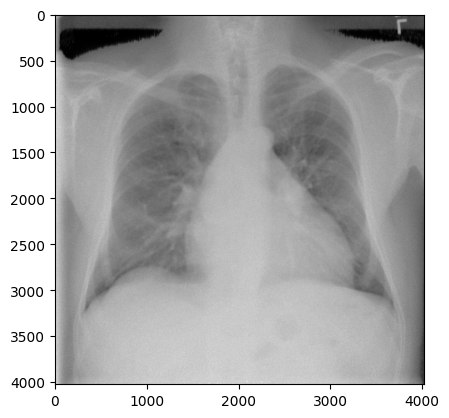

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('nih_CameraSim_processed_correct.tif')
img = np.array(img, dtype=np.float32)
high = np.percentile(img, 99)
low = np.percentile(img, 1)
img = img.clip(low, high)
print(f"high: {high} low: {low}")
img = (img - low) / (high - low)

print(img)
plt.imshow(img, cmap="gray")



high: 237.0 low: 0.0
[[0.8523207  0.83966243 0.8227848  ... 0.02109705 0.00843882 0.        ]
 [0.83966243 0.8270042  0.8227848  ... 0.02109705 0.00843882 0.        ]
 [0.8270042  0.8185654  0.814346   ... 0.02109705 0.00843882 0.        ]
 ...
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]]


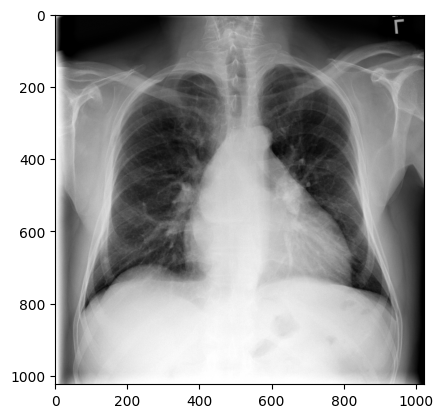

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('nih_original_processed.png')
img = np.array(img, dtype=np.float32)
high = np.percentile(img, 99)
low = np.percentile(img, 1)
img = img.clip(low, high)
print(f"high: {high} low: {low}")
img = (img - low) / (high - low)

print(img)
plt.imshow(img, cmap="gray")

img = Image.fromarray(img)
img.save('original.tif')

In [ ]:
import numpy as np
from scipy.ndimage import uniform_filter



def estimate_noise_map(img, window_size=7):
    """
    Estimate spatially-varying noise (std dev) over an image using local variance.
    
    Args:
        img (np.ndarray): Grayscale image as float32 or float64.
        window_size (int): Size of the sliding window (odd number, e.g. 5, 7).
        
    Returns:
        np.ndarray: Estimated local noise map (same shape as input).
    """
    img = img.astype(np.float32)
    mean = uniform_filter(img, window_size)
    sq_mean = uniform_filter(img**2, window_size)
    variance = sq_mean - mean**2
    local_std = np.sqrt(np.clip(variance, 0, None))  # prevent negative due to float errors
    return local_std



Slope: 0.0862940275650842, Intercept: 625.3445635528333
Slope: 3.262904207096617e-06, Intercept: 0.023645198455508484


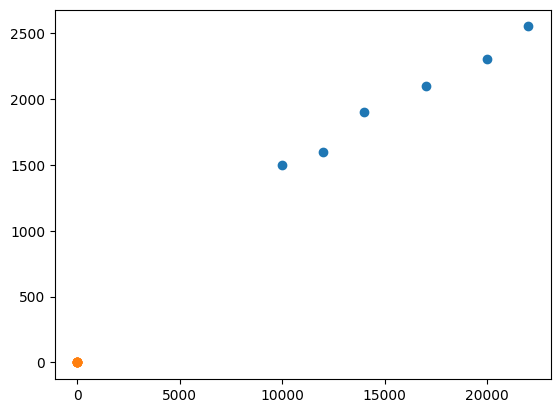

In [ ]:
x= np.array([22_000, 12_000, 17_000, 20_000, 10_000, 14_000])
y = np.array([2550, 1600, 2100, 2300, 1500, 1900])

plt.scatter(x,y)

A = np.vstack([x, np.ones_like(x)]).T
m, b = np.linalg.lstsq(A, y, rcond=None)[0]

print(f"Slope: {m}, Intercept: {b}")

plt.show()
# normd
xn = (x - low) / (high - low)
yn = y / (high - low)

plt.scatter(xn,yn)

A = np.vstack([x, np.ones_like(xn)]).T
m, b = np.linalg.lstsq(A, yn, rcond=None)[0]

print(f"Slope: {m}, Intercept: {b}")
plt.show()

# Noise Analysis
In the 4k x 4k image: std_dev = 625 + mean * 0.086

high: 28766.0 low: 2319.0
[[0.6221878  0.8954891  0.8921239  ... 0.508224   0.29655537 0.31519642]
 [0.7402352  0.6916096  0.7594056  ... 0.44349074 0.48962075 0.30729383]
 [0.7442054  1.         0.690135   ... 0.3677922  0.23647295 0.26180664]
 ...
 [0.53635573 0.82686126 0.9078534  ... 0.12152607 0.20588346 0.14277612]
 [1.         1.         0.9230537  ... 0.29190457 0.13400386 0.1710591 ]
 [0.9202934  0.79941016 0.69062656 ... 0.28483382 0.36215827 0.2726207 ]]
(1006, 1006)
(1006, 1006)


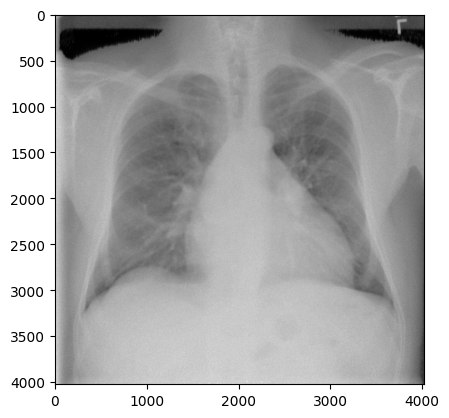

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
from scipy.ndimage import uniform_filter



def estimate_noise_map(img, window_size=7):
    """
    Estimate spatially-varying noise (std dev) over an image using local variance.
    
    Args:
        img (np.ndarray): Grayscale image as float32 or float64.
        window_size (int): Size of the sliding window (odd number, e.g. 5, 7).
        
    Returns:
        np.ndarray: Estimated local noise map (same shape as input).
    """
    img = img.astype(np.float32)
    mean = uniform_filter(img, window_size)
    sq_mean = uniform_filter(img**2, window_size)
    variance = sq_mean - mean**2
    local_std = np.sqrt(np.clip(variance, 0, None))  # prevent negative due to float errors
    return local_std



# x= [22_000, 12_000, 17_000, 20_000, 10_000, 14_000]
# y = [2550, 1600, 2100, 2300, 1500, 1900]

# plt.scatter(x,y)

# A = np.vstack([x, np.ones_like(x)]).T
# m, b = np.linalg.lstsq(A, y, rcond=None)[0]

# print(f"Slope: {m}, Intercept: {b}")




img = Image.open('nih_CameraSim_processed_correct.tif')
img = np.array(img, dtype=np.float32)
high = np.percentile(img, 99)
low = np.percentile(img, 1)
img = img.clip(low, high)
print(f"high: {high} low: {low}")
img = (img - low) / (high - low)

print(img)
plt.imshow(img, cmap="gray")

# img = Image.fromarray((img * 255).astype(np.uint8))
# img.save('output.png')



def downscale_2x2_average(img):
    # Ensure dimensions are even
    h, w = img.shape
    h_trim, w_trim = h - h % 2, w - w % 2
    img_cropped = img[:h_trim, :w_trim]

    # Reshape and compute mean over 2x2 blocks
    downscaled = img_cropped.reshape(h_trim//2, 2, w_trim//2, 2).mean(axis=(1, 3))

    return downscaled

# Example usage
downscaled_img = downscale_2x2_average(downscale_2x2_average(img))

img_local_noise = estimate_noise_map(downscaled_img)

print(downscaled_img.shape)  
img_local_noise = Image.fromarray((img_local_noise * 255).astype(np.uint8))
img_local_noise.save('img_local_noise.png')


print(downscaled_img.shape)  
downscaled_img = Image.fromarray((downscaled_img * 255).astype(np.uint8))
downscaled_img.save('downscaled_img.png')
